In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### read data

In [ ]:
df = pd.read_csv('perceptron.csv')
df.head()

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0


### split train and test

In [ ]:
from sklearn.model_selection import train_test_split

y = list(df['y'])
x = df.drop(['y'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### visualize functions

In [ ]:
def vis(data, x_label, y_label):
  x = list(data[x_label])
  y = list(data[y_label])
  map_class = {'-1' : -1, '1' : 1}
  c = [i for i in list(data['y'])]
  plt.figure(figsize=(12,6))
  scatter = plt.scatter(x, y, c=c)
  plt.legend(handles=scatter.legend_elements()[0], labels=list(map_class.keys()))
  plt.title('perceptron classification according to (x1 , x2) features')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

In [ ]:
def vis_data_classifier(data, labels, w, b, theta, x_label, y_label):
  x = list(data[x_label])
  y = list(data[y_label])
  map_class = {'-1' : -1, '1' : 1}
  c = [i for i in list(labels)]
  plt.figure(figsize=(12,6))
  x_range = np.linspace(np.min(x), np.max(x), 100)
  y_range = [(theta-b-(w[0]*i))/w[1] for i in x_range]
  y2_range = [(-theta-b-(w[0]*i))/w[1] for i in x_range]
  l1 = plt.plot(x_range, y_range, 'r', label='classifier 1')
  l1 = plt.plot(x_range, y2_range, 'r', label='classifier 2')
  legend1 = plt.legend(loc='lower left')
  scatter = plt.scatter(x, y, c=c)
  plt.legend(handles=scatter.legend_elements()[0], labels=list(map_class.keys()), loc='upper right')
  plt.gca().add_artist(legend1)
  plt.title('perceptron classification according to (x1 , x2) features')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

### visualize binary class data 

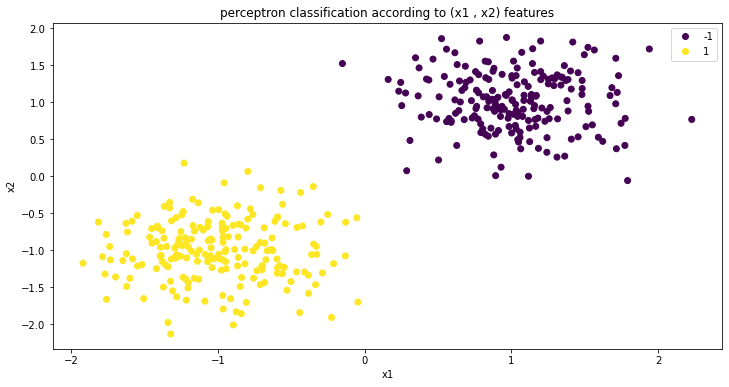

In [ ]:
vis(df, 'x1', 'x2')

In [ ]:
def active(net, theta):
  if net > theta:
    return 1
  elif theta >= net >= (-1*theta):
    return 0
  elif net < (-1*theta):
    return -1

### learn Perceptron

In [ ]:
def learn(x, y, theta):
  w = np.zeros(x.shape[1])
  b = 0
  a = 1
  epoch_count = 0
  while True:
    print('epoch ', epoch_count)
    epoch_count += 1
    zero_samples = set()
    for i, s in enumerate(x.values):
      h = active(np.dot(s, w)+b, theta)
      error = h-y[i]
      if error != 0:
        w = w + a*y[i]*s
        b = b + a*y[i]
        zero_samples = set()
      else:
        zero_samples.add(i)
    if zero_samples == set(range(x.shape[0])):
      break
  return w, b

w, b = learn(X_train, y_train, 7)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14


### draw classifier lines

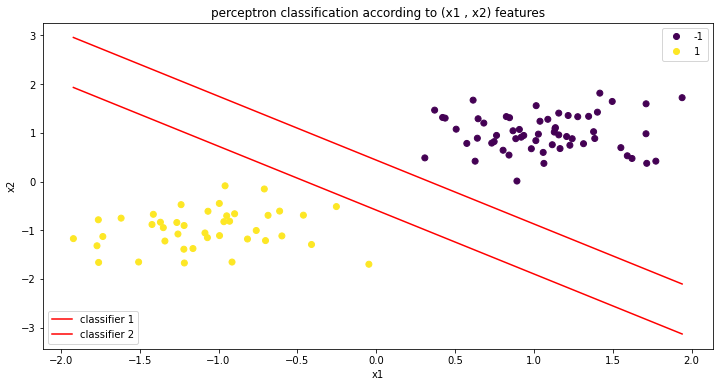

In [ ]:
vis_data_classifier(X_test, y_test, w, b, 7, 'x1', 'x2')

In [ ]:
def pred(w, b, x, theta):
  res = []
  for i, s in enumerate(x.values):
      res.append(active(np.dot(s, w)+b, theta))
  return res

y_pred = pred(w, b, X_test, 7)

### classification performance report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        41

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### use another theta

In [ ]:
w, b = learn(X_train, y_train, 0)

epoch  0
epoch  1


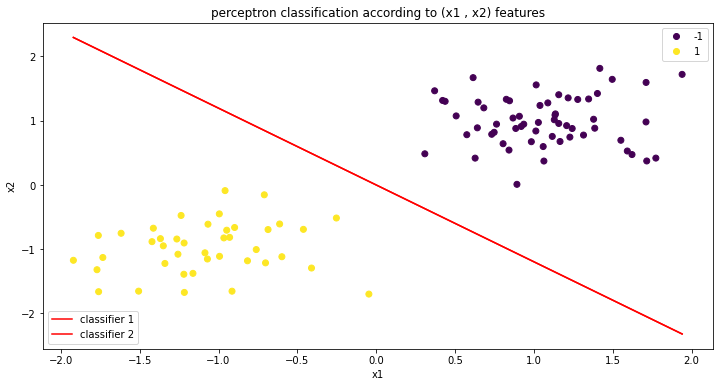

In [ ]:
vis_data_classifier(X_test, y_test, w, b, 0, 'x1', 'x2')

In [ ]:
y_pred = pred(w, b, X_test, 0)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        41

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

